# COVID-19
千葉県市川市の感染データを解析します。

## データの読み込み

In [1]:
import pandas as pd

df = pd.read_csv('corona.csv')

In [2]:
df["発症日"] = df["発症日"].replace("不明", "")
df["発症日"] = df["発症日"].replace("調査中", "")
df["発症日"] = pd.to_datetime(df["発症日"], format="%Y-%m-%d")

df["検査確定日"] = df["検査確定日"].replace("不明", "")
df["検査確定日"] = df["検査確定日"].replace("調査中", "")
df["検査確定日"] = pd.to_datetime(df["検査確定日"], format="%Y-%m-%d")

df["死亡日"] = df["死亡日"].replace("不明", "")
df["死亡日"] = df["死亡日"].replace("調査中", "")
df["死亡日"] = pd.to_datetime(df["死亡日"], format="%Y-%m-%d")

In [3]:
df.dtypes

分類                object
市内                 int64
県内               float64
年                  int64
性別                object
職業                object
推定感染経路            object
発症日       datetime64[ns]
検査確定日     datetime64[ns]
死亡日       datetime64[ns]
行動歴               object
dtype: object

## 要約統計量

In [4]:
df.describe().loc[:,"年"]

count    10484.000000
mean        33.762877
std         19.806501
min          0.000000
25%         20.000000
50%         30.000000
75%         50.000000
max         90.000000
Name: 年, dtype: float64

## ヒストグラム

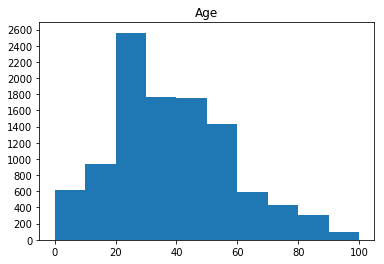

In [5]:
# 年齢
import matplotlib.pyplot as plt
%matplotlib inline

plt.title("Age")
plt.yticks([0,200,400,600,800,1000,1200,1400,1600,1800,2000,2200,2400,2600])
plt.hist(df["年"], range=(0, 100));

In [6]:
df = df.dropna(subset=['検査確定日'])

C:\Users\mine\Anaconda3\envs\Everything\lib\site-packages\pandas\plotting\_matplotlib\converter.py:102: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


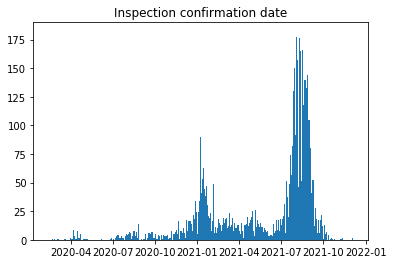

In [7]:
# 検査確定日
days = (df["検査確定日"].max()-df["検査確定日"].min()).days+1

plt.title("Inspection confirmation date")
hist = plt.hist(df["検査確定日"], bins=days)

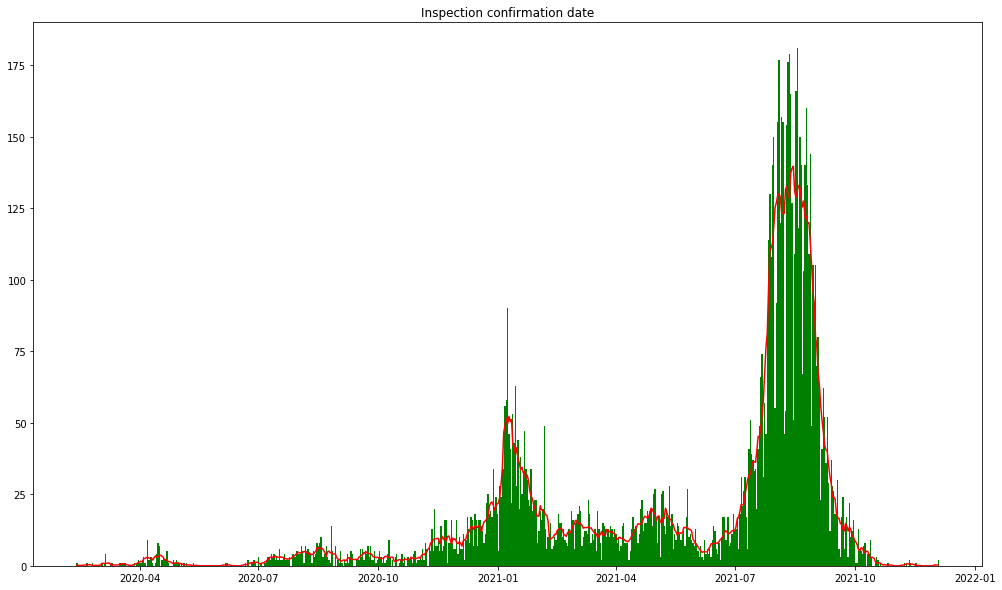

In [8]:
# 移動平均（7日）
import numpy as np
import datetime

left = np.arange(df["検査確定日"].min(), df["検査確定日"].max()+datetime.timedelta(days=1), np.timedelta64(1,'D'))

num = 7
b = np.ones(num) / num
y2 = np.convolve(hist[0], b, mode='same')

plt.figure(figsize=(17, 10))
plt.title("Inspection confirmation date")
plt.bar(left, hist[0], color='green', width=1.0, linewidth=0.0);
plt.plot(left, y2, color='red')